In [616]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
# pd.set_option("display.max.rows",None)
# pd.set_option("display.max.columns",None)


from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE

In [617]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [618]:
# pip install xgboost


In [619]:
# pip install lightgbm


In [620]:
# pip install catboost

In [621]:
#b means cabin name p mens PORT,s means starboard

In [622]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [623]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# Checking Dimention of Data

In [625]:
print("Training Dataset shape is: ",train_df.shape)
print("Testing Dataset shape is: ",test_df.shape)

Training Dataset shape is:  (8693, 14)
Testing Dataset shape is:  (4277, 13)


# Checking Duplicate Data


In [627]:
print(f"Duplicates in Train Dataset is:{train_df.duplicated().sum()},({100*train_df.duplicated().sum()/len(train_df)})%")
print(f"Duplicates in Test Dataset is:{test_df.duplicated().sum()},({100*test_df.duplicated().sum()/len(test_df)})%")


Duplicates in Train Dataset is:0,(0.0)%
Duplicates in Test Dataset is:0,(0.0)%


In [628]:
# WE Dont Have any type of data lekage in our data set

# Checking Data types of Training And Testing Data

In [630]:
print("Data Types of features of Training Data is:")
print(train_df.dtypes)
# print("\n"+"-"*100)
print("\nData types of features of Testing Data is:")
print(test_df.dtypes)

Data Types of features of Training Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Data types of features of Testing Data is:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


# Checking Missing values

In [632]:
df1 = (train_df.isnull().sum()[train_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df1["% of Missing Values"] = round((100*train_df.isnull().sum()[train_df.isnull().sum()>0]/len(train_df)),2)
df1

,Number of Missing values,% of Missing Values
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11


# Checking Missing Values on Testing Data

In [634]:
df2 = (test_df.isnull().sum()[test_df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
df2["% of Missing Values"] = round((100*test_df.isnull().sum()[test_df.isnull().sum()>0]/len(test_df)),2).values
df2

,Number of Missing values,% of Missing Values
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29
Spa,101,2.36


# Check The Cardinality

In [636]:
print("cardinality of categorical features in training datasets is:")
print(train_df.select_dtypes(include="object").nunique())
print("\n","-"*70)
print("\nCardinality of categorical features in testing datsets is:")
print(test_df.select_dtypes(include="object").nunique())

cardinality of categorical features in training datasets is:
PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

 ----------------------------------------------------------------------

Cardinality of categorical features in testing datsets is:
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


In [637]:
train_df.select_dtypes(include="O").nunique()

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64

In [638]:
c=train_df.select_dtypes(include="O")
for i in c:
    if i!="PassengerId" and i!="Cabin" and i!="Name":
        print(i,"....",c[i].unique(),c[i].nunique())



HomePlanet .... ['Europa' 'Earth' 'Mars' nan] 3
CryoSleep .... [False True nan] 2
Destination .... ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 3
VIP .... [False True nan] 2


# Now WE Apply EDA

In [640]:
train_df["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [641]:
c=train_df["Transported"].value_counts().values
c

array([4378, 4315], dtype=int64)

In [642]:
d=train_df["Transported"].value_counts().index

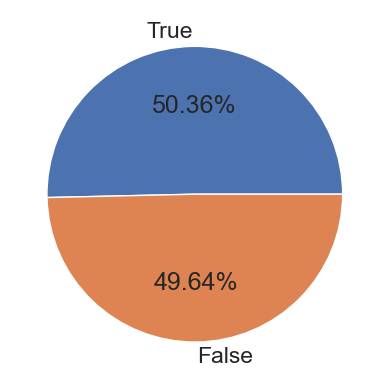

In [643]:
plt.pie(c,labels=d,autopct="%0.2f%%")
plt.show()

# Visualize Age Feature

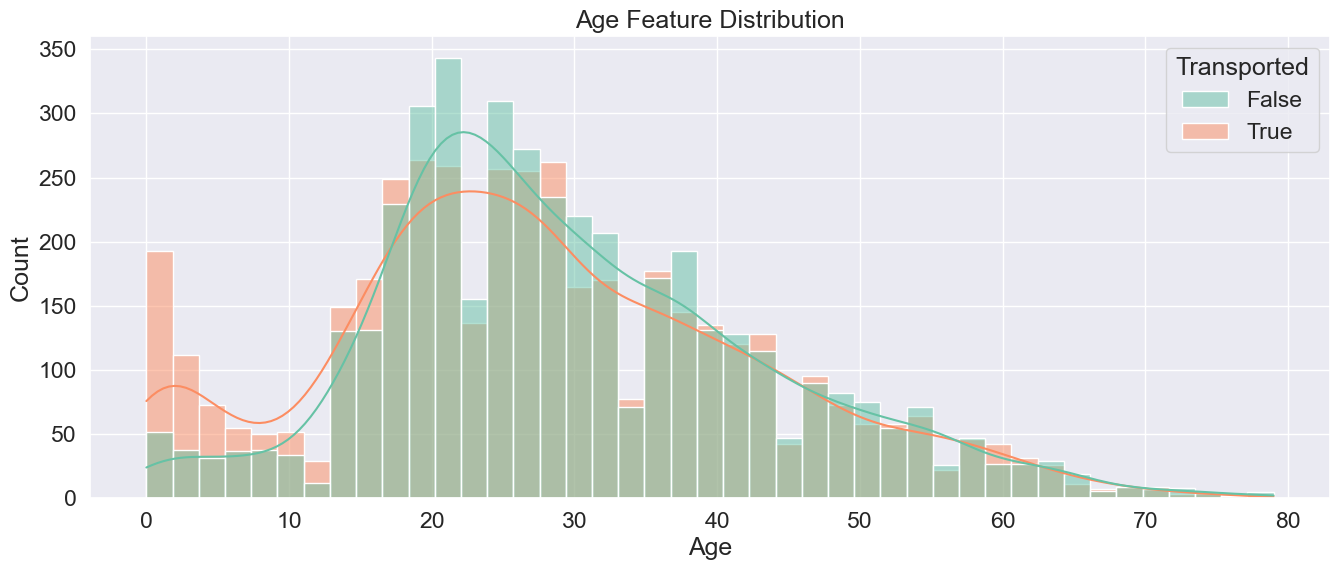

In [645]:
plt.figure(figsize=(16,6))
sns.histplot(x=train_df["Age"],hue="Transported",data=train_df,kde=True,palette="Set2")
plt.title("Age Feature Distribution")
plt.show()


### Visualizing All Expenditure Features ("RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck")

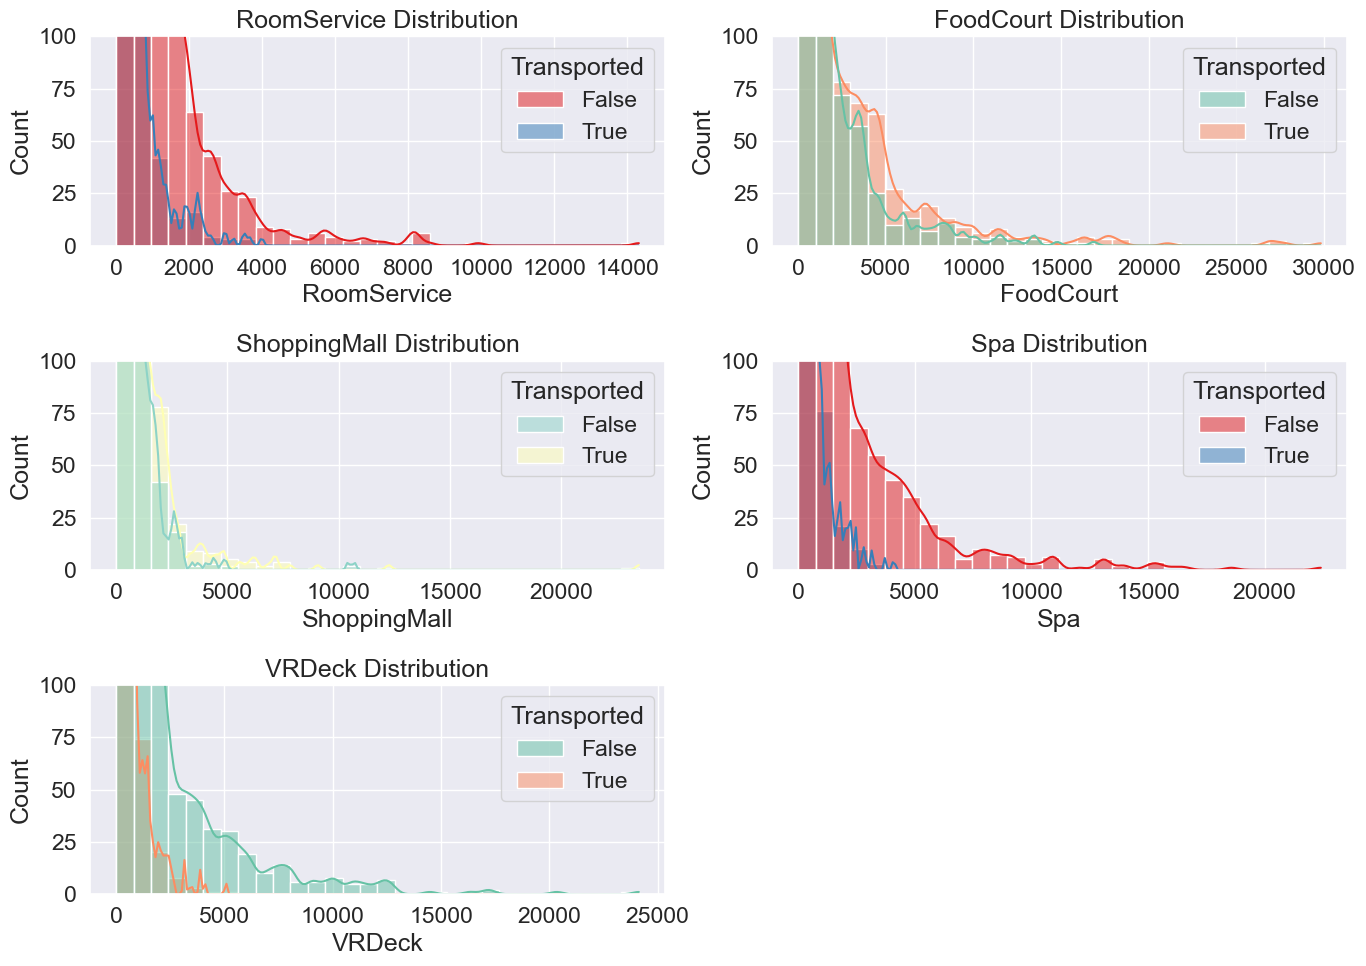

In [647]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
color=['Set1','Set2','Set3','Set1','Set2']

plt.figure(figsize=(14,10))
for idx,column in enumerate(exp_cols):
    plt.subplot(3,2,idx+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette=color[idx])
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()
plt.show()


### Visualizing Categorical Features ("HomePlanet", "CryoSleep", "Destination", "VIP")

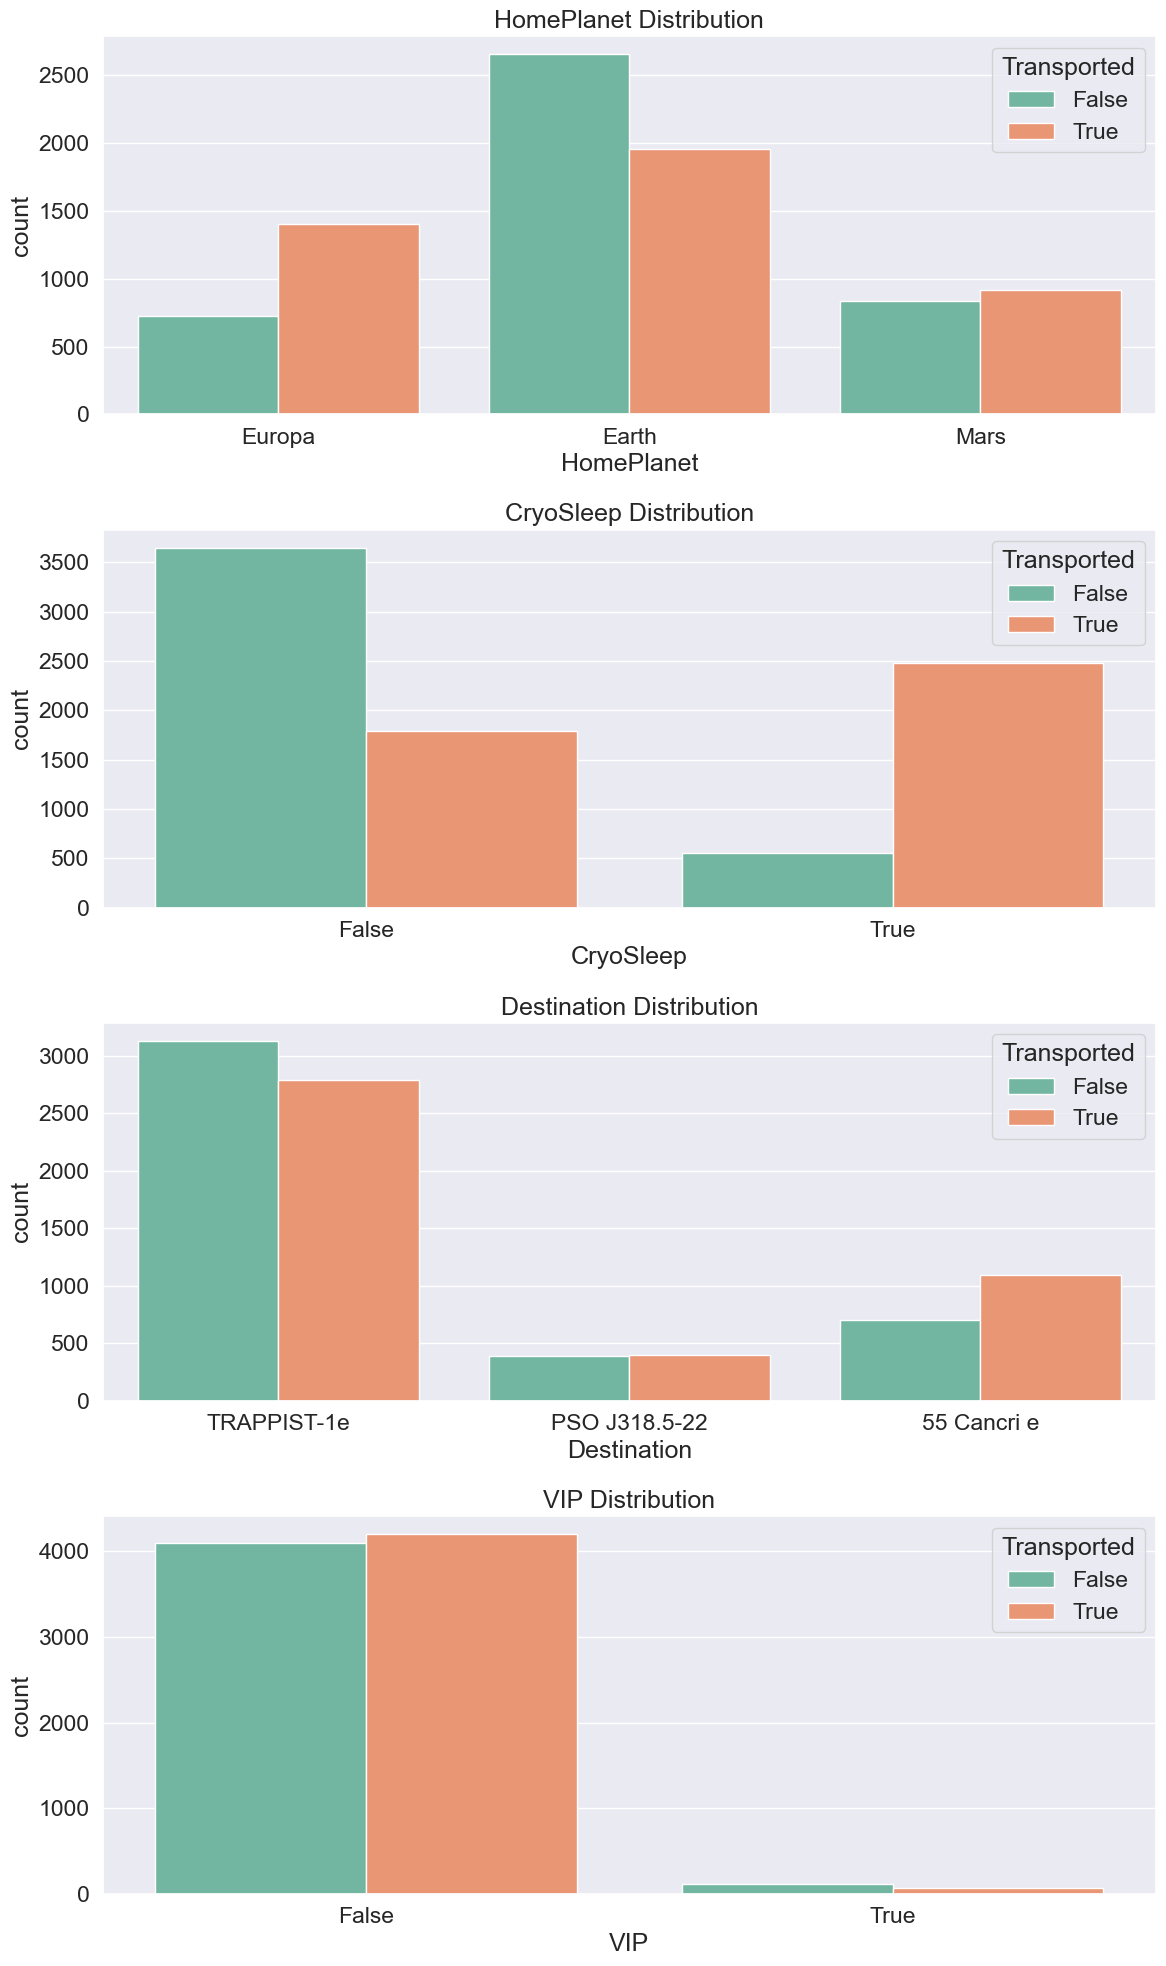

In [649]:
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()

###  Creating New Feature From "PassengerId" Feature.

In [651]:
train_df["PassengerId"].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


In [652]:
train_df["PassengerId"].apply(lambda x: x.split("_")[0])[:5]

0    0001
1    0002
2    0003
3    0003
4    0004
Name: PassengerId, dtype: object

In [653]:
train_df["PassengerId"].apply(lambda x: x.split("_")[1])[:5]

0    01
1    01
2    01
3    02
4    01
Name: PassengerId, dtype: object

In [654]:
q=train_df.copy()
q.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [655]:
q["Group"]=q["PassengerId"].apply(lambda x: x.split("_")[0])
q["Member"] =q["PassengerId"].apply(lambda x: x.split("_")[1])
q.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [656]:
x = q.groupby("Group")["Member"].count().sort_values()


In [657]:
y=set(x[x>1].index)

In [658]:
q["Travelling_Solo"]=q["Group"].apply(lambda x: x not in y)

In [659]:
q["Group_Size"]=0
for i in x.items():
    q.loc[q["Group"]==i[0],"Group_Size"]=i[1]

In [660]:
q.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,True,1


In [661]:
def passengerid_new_features(df):
    
    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()
    
    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)
    
    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)
    
    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [662]:
passengerid_new_features(train_df)
passengerid_new_features(test_df)

In [663]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Member,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,True,1


In [664]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

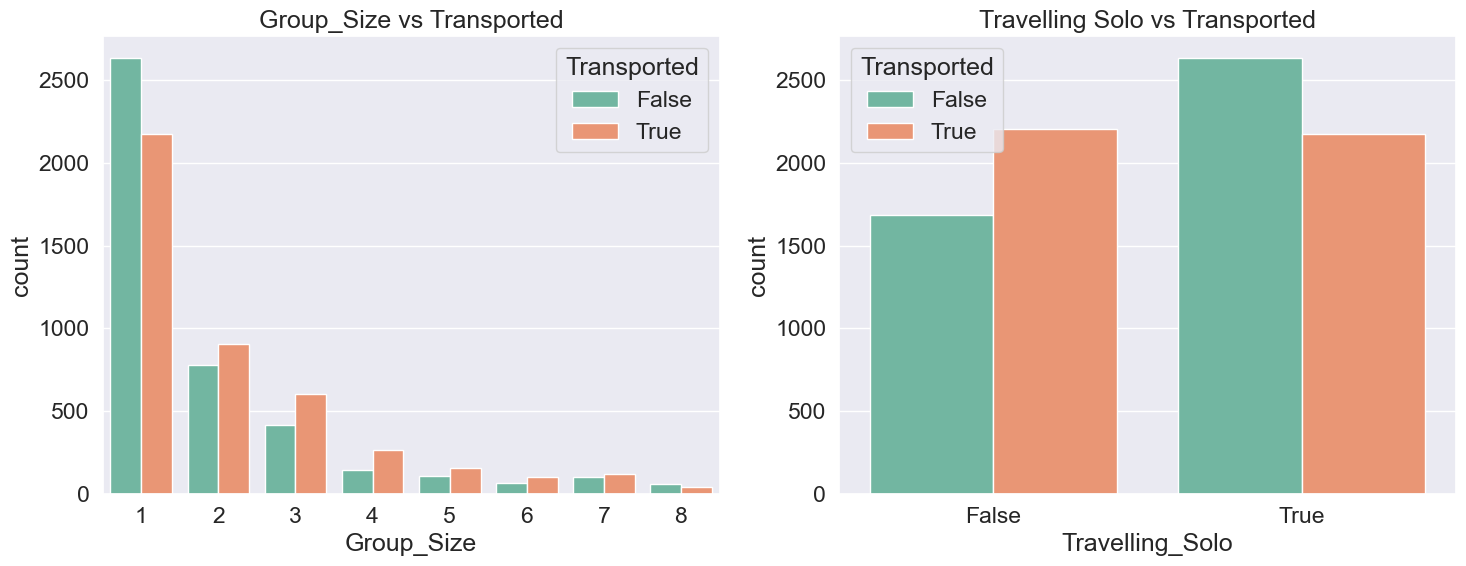

In [665]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df,palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

In [666]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,1


In [667]:
train_df["Cabin"].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


In [668]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
    
    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].mode()[0],inplace=True)

In [669]:
cabin_new_feature(train_df)
cabin_new_feature(test_df)

In [670]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8492 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8693 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8514 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8512 non-null   float64
 8   FoodCourt        8510 non-null   float64
 9   ShoppingMall     8485 non-null   float64
 10  Spa              8510 non-null   float64
 11  VRDeck           8505 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  Travelling_Solo  8693 non-null   bool   
 15  Group_Size       8693 non-null   int64  
 16  Cabin_Deck       8693 non-null   object 
 17  Cabin_Number  

In [671]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Travelling_Solo', 'Group_Size', 'Cabin_Deck',
       'Cabin_Number', 'Cabin_Side'],
      dtype='object')

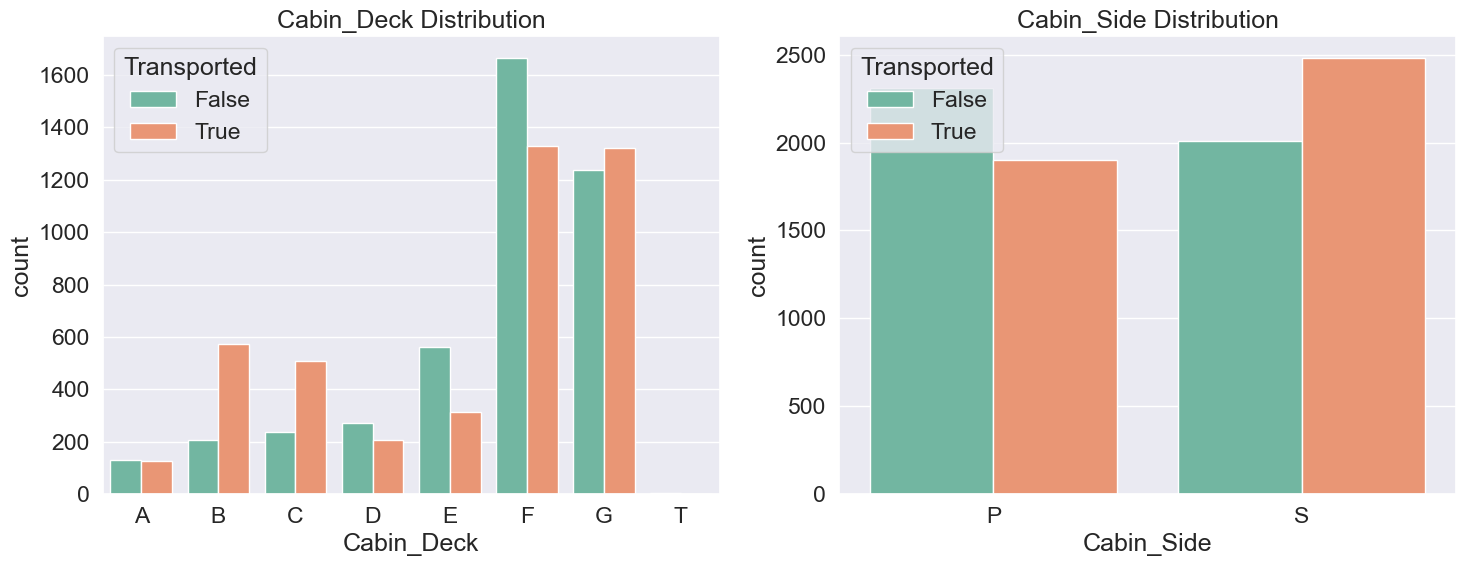

In [672]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=train_df, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

In [673]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

In [674]:
print("Total Unique values present in Cabin_Number feature is:",train_df["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",train_df["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",train_df["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",train_df["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",train_df["Cabin_Number"].max())

Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  588.5012078683999
The Median of Cabin_Number Feature is: 407.0
The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


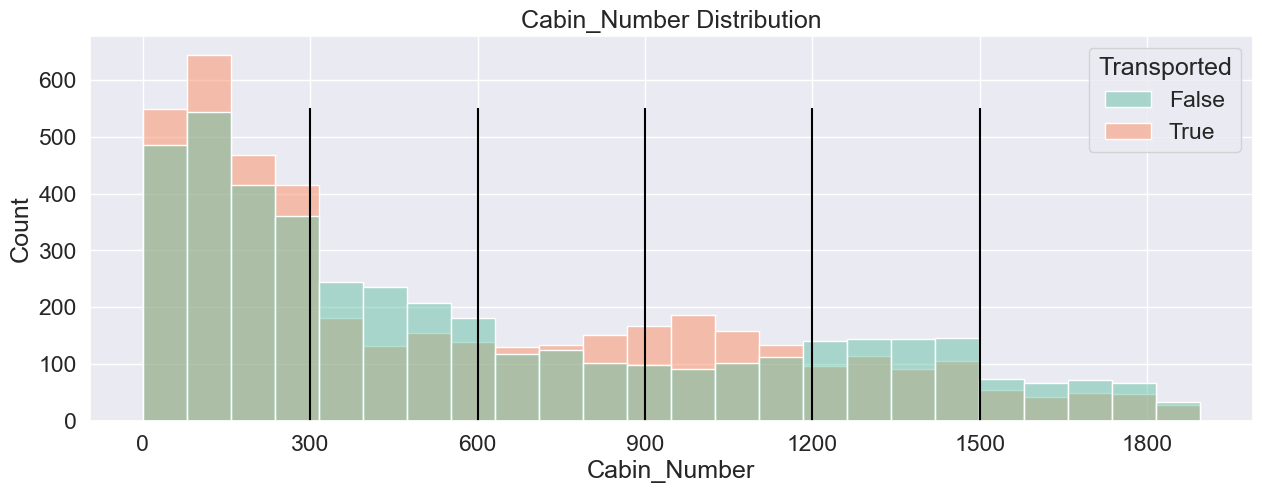

In [675]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

In [676]:
# train_df["Cabin_Number"]

In [677]:
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [678]:
cabin_regions(train_df)
cabin_regions(test_df)

In [679]:
train_df.drop(columns=["Cabin_Number"],inplace=True)
test_df.drop(columns=["Cabin_Number"],inplace=True)

In [680]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,True,1,B,P,True,False,False,False,False,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,1,F,S,True,False,False,False,False,False


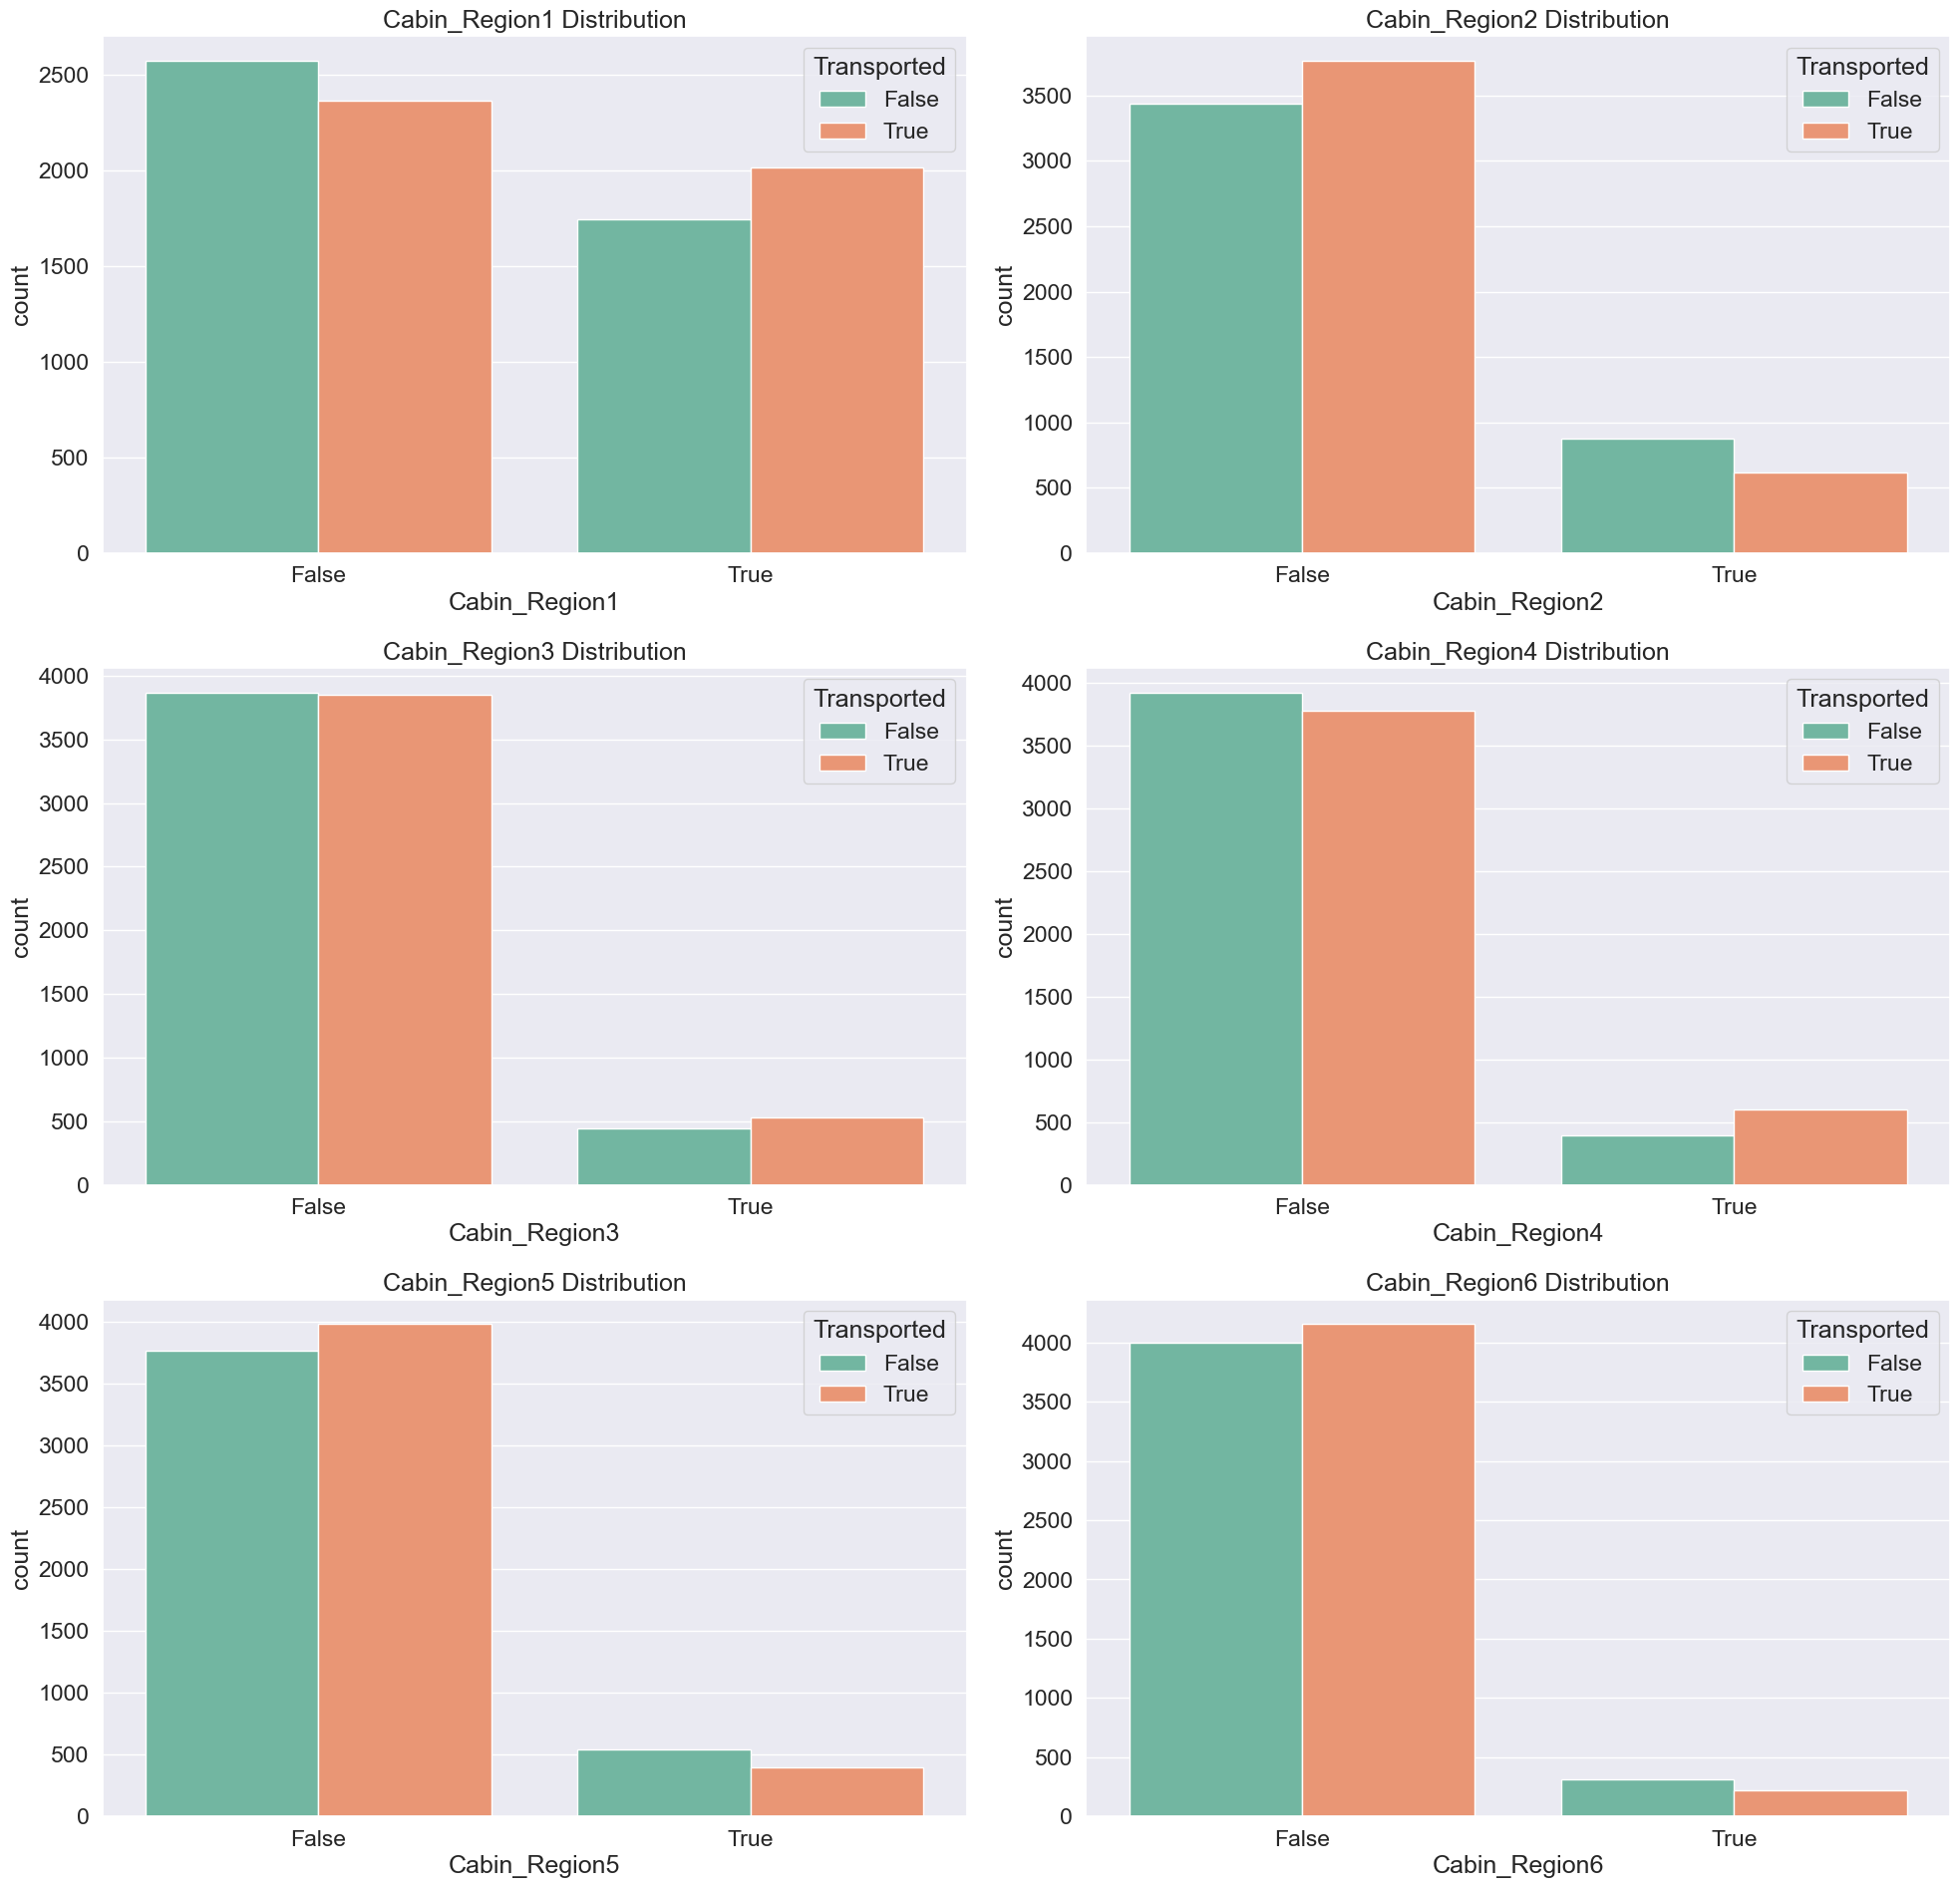

In [681]:
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()
plt.show()

In [682]:
train_df["Age"].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [683]:
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_13-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
        
    df["Age Group"] = age_group

In [684]:
age_group(train_df)
age_group(test_df)

In [685]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,1,B,P,True,False,False,False,False,False,Age_33_50
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,1,F,S,True,False,False,False,False,False,Age_19-25


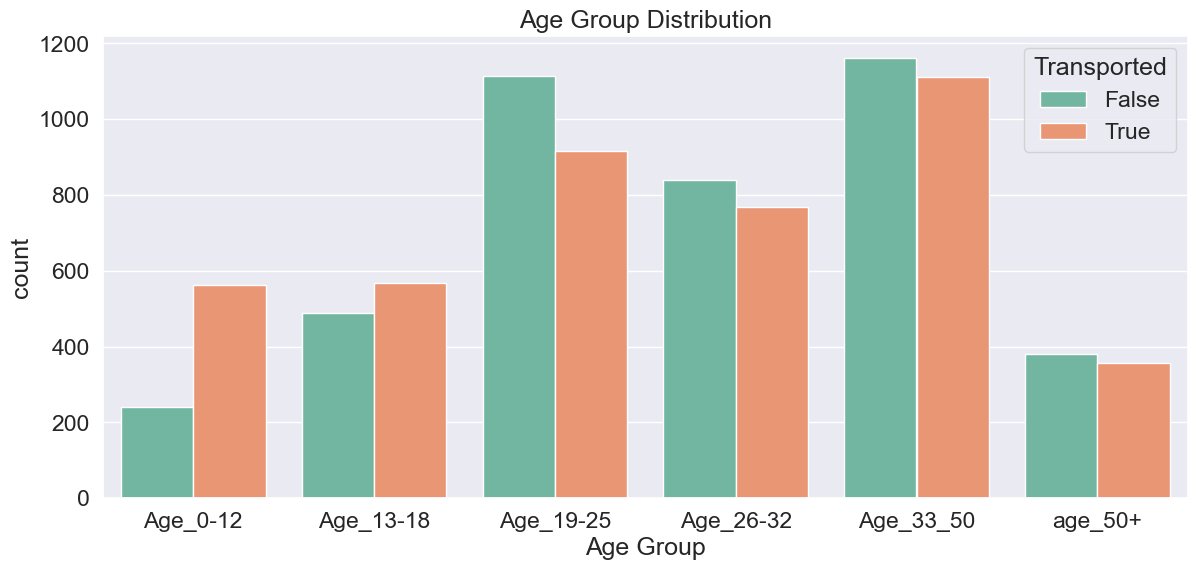

In [686]:
order = sorted(train_df["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=train_df, palette="Set2",order=order)
plt.title("Age Group Distribution")
plt.show()

In [687]:
train_df[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [688]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)

In [689]:
new_exp_features(train_df)
new_exp_features(test_df)

In [690]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,P,True,False,False,False,False,False,Age_33_50,0.0,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,S,True,False,False,False,False,False,Age_19-25,736.0,False


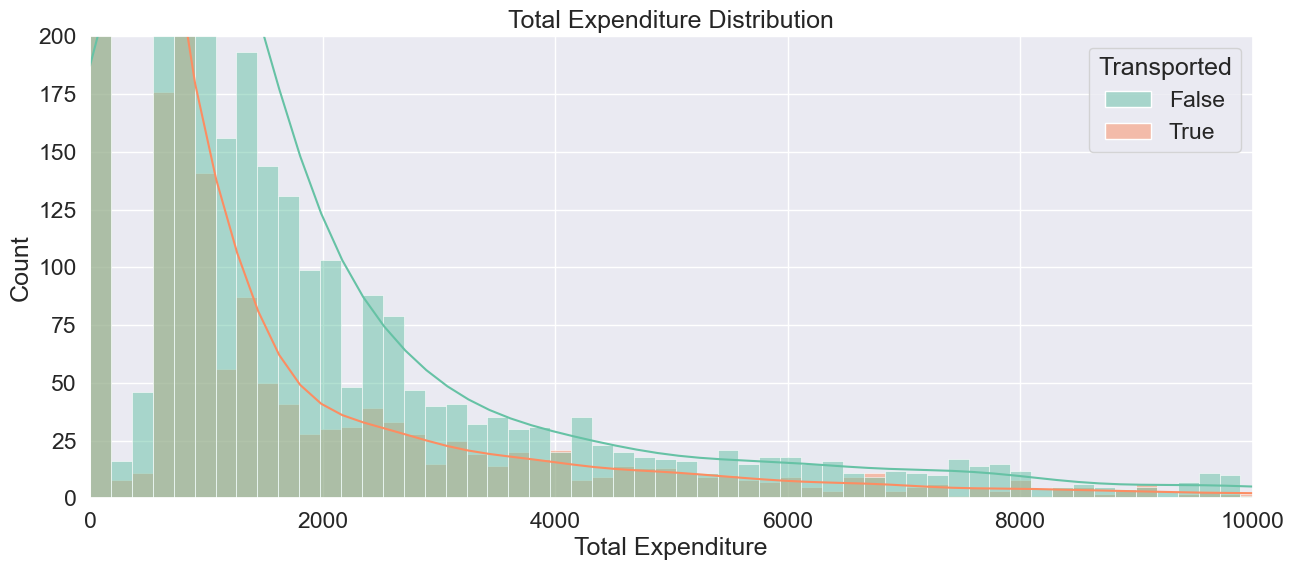

In [691]:
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=train_df, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution")
plt.show()

In [692]:
mean = round(train_df["Total Expenditure"].mean())
median = train_df["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = ",mean)
print("Median value of Total Expenditure feature is = ",median)

Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure feature is =  716.0


In [693]:
def expenditure_category(df):
    expense_category = []
    
    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")
    
    df["Expenditure Category"] = expense_category

In [694]:
expenditure_category(train_df)
expenditure_category(test_df)

In [695]:
train_df.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,True,False,False,False,False,False,Age_33_50,0.0,True,No Expense
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,True,False,False,False,False,False,Age_19-25,736.0,False,Medium Expense


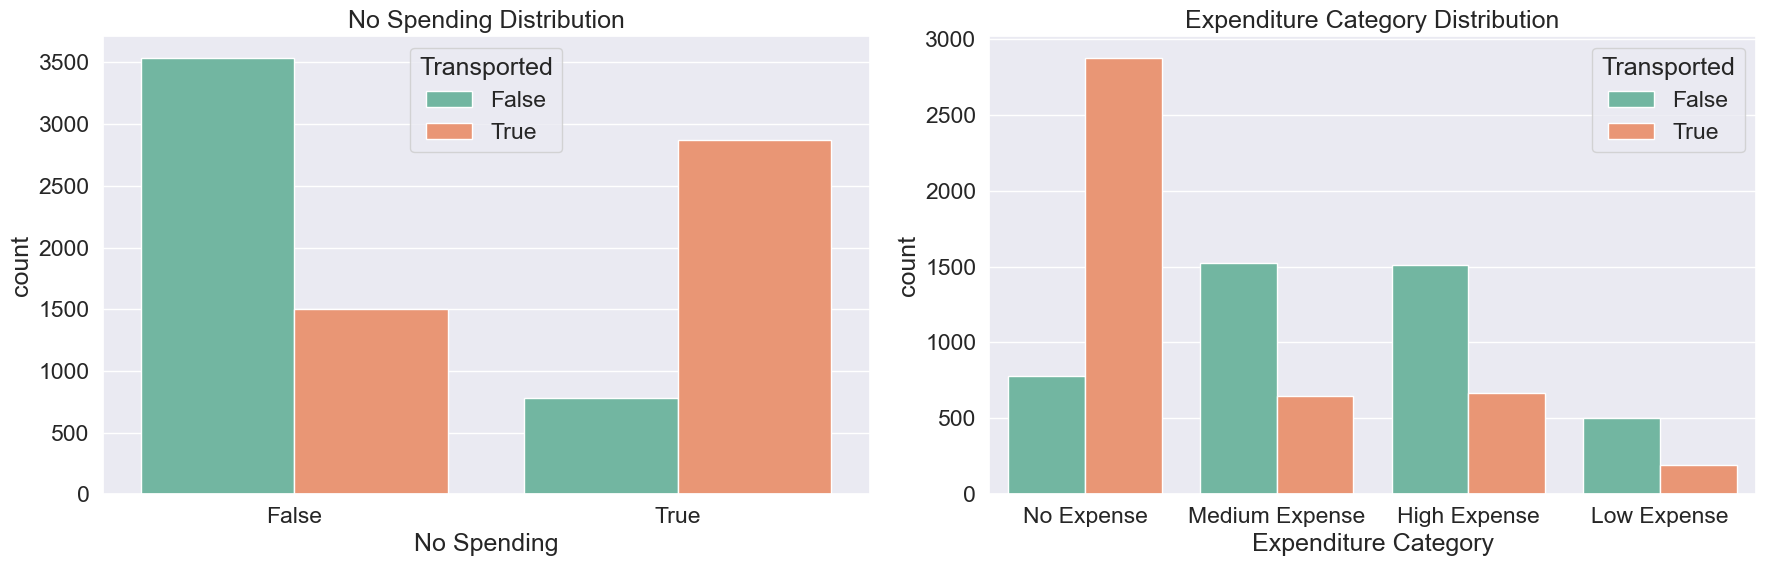

In [696]:
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()
plt.show()

In [697]:
z = train_df.isnull().sum()[train_df.isnull().sum()>0].to_frame().rename(columns={0:"No. of Missing values"})
z["% of Missing values"] = round(train_df.isnull().sum()[train_df.isnull().sum()>0]*100/len(train_df),2)
z

,No. of Missing values,% of Missing values
HomePlanet,201,2.31
CryoSleep,217,2.50
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39
Spa,183,2.11
VRDeck,188,2.16


In [698]:
# pip install missingno

In [699]:
import missingno as msno

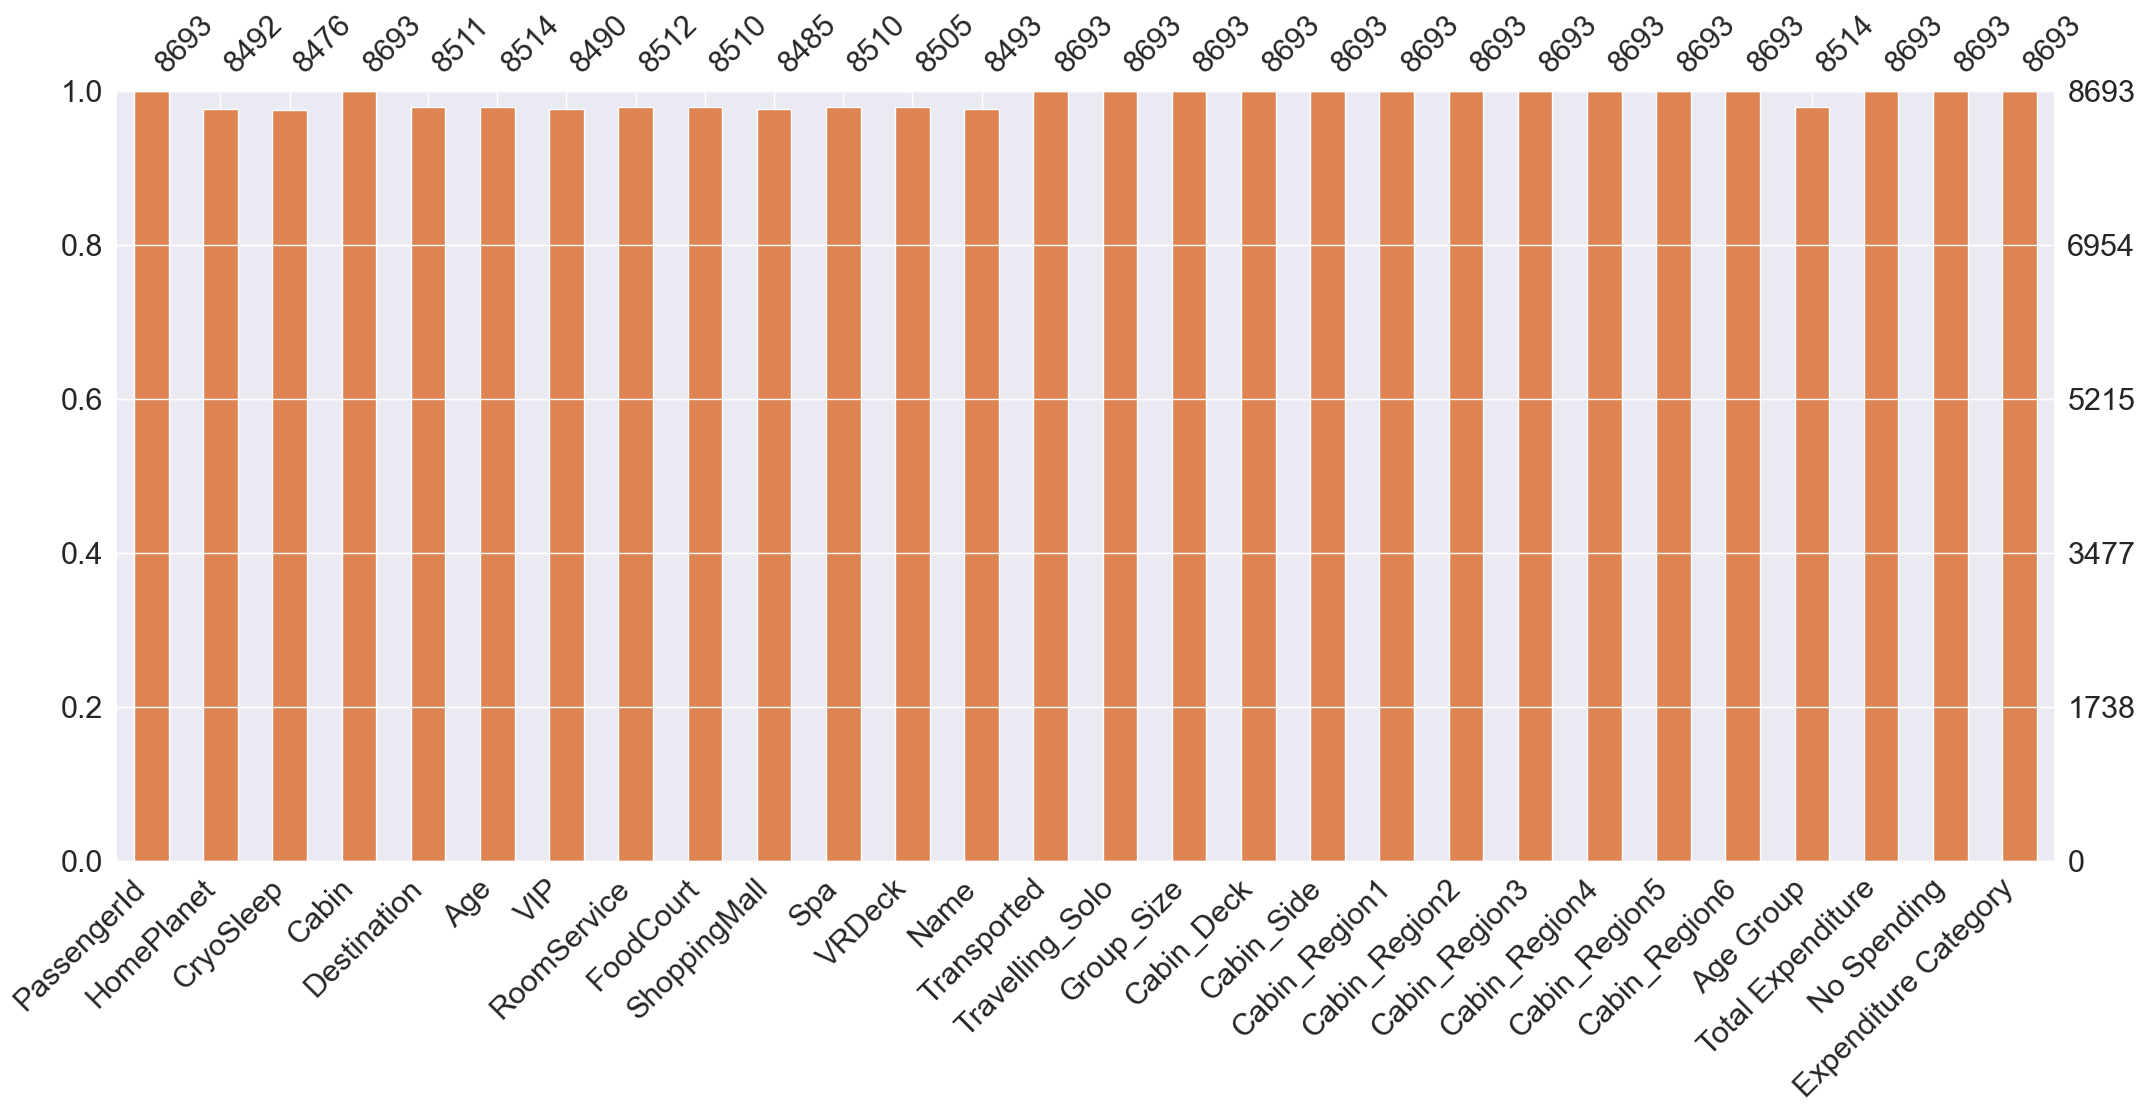

In [700]:
msno.bar(train_df,color="C1",fontsize=22)
plt.show()

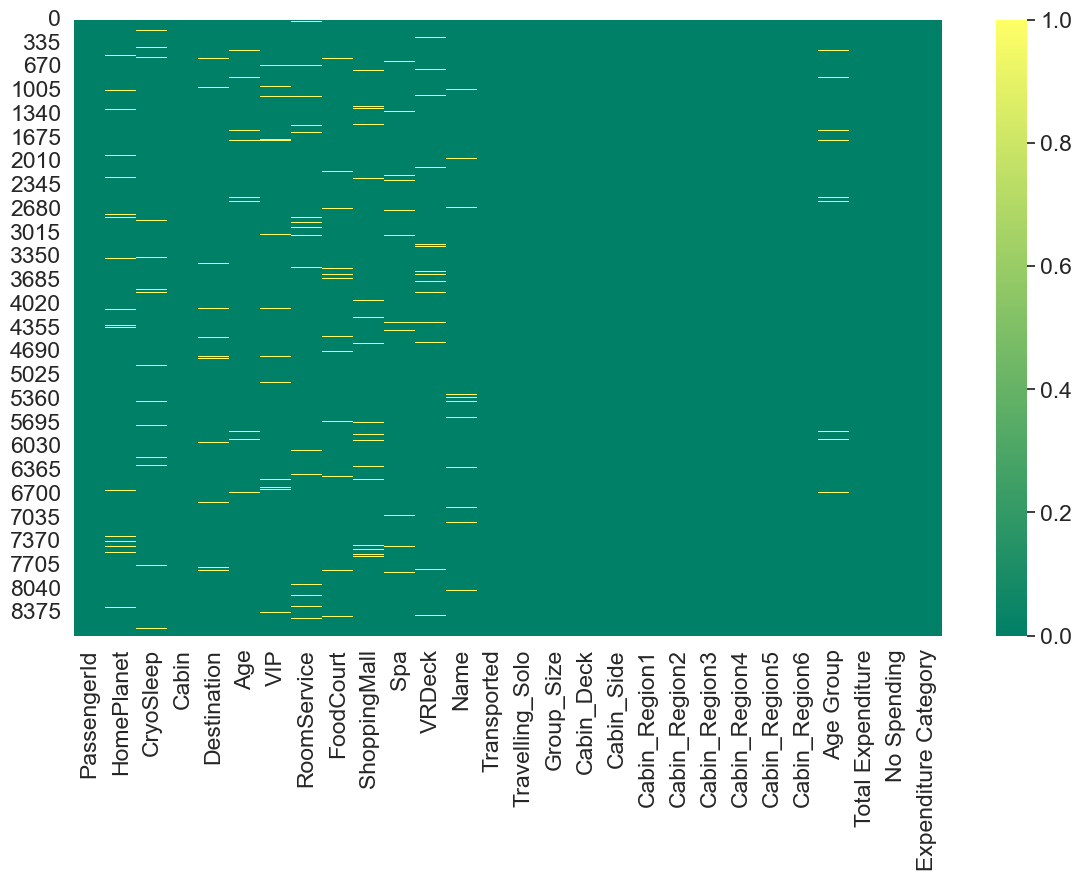

In [701]:
plt.figure(figsize=(14,8))
sns.heatmap(train_df.isnull(),cmap="summer")
plt.show()

In [702]:
cat_cols = train_df.select_dtypes(include=["object","bool"]).columns.tolist()
cat_cols.remove("Transported")
num_cols = train_df.select_dtypes(include=["int","float"]).columns.tolist()

In [703]:
print("Categorical Columns:",cat_cols)
print("\n","-"*120)
print("\nNumerical Columns:",num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'No Spending', 'Expenditure Category']

 ------------------------------------------------------------------------------------------------------------------------

Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total Expenditure']


In [704]:
imputer1 = SimpleImputer(strategy="most_frequent")     ##To fill Categorical Features.
imputer2 = SimpleImputer(strategy="median")            ##To fill numeircal features.

In [705]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [706]:
fill_missingno(train_df)
fill_missingno(test_df)

In [707]:
print("Missing numbers left in train_df is:",train_df.isnull().sum().sum())
print("Missing numbers left in test_df is:",test_df.isnull().sum().sum())

Missing numbers left in train_df is: 0
Missing numbers left in test_df is: 0


In [708]:
print("Duplicate values in training data is: ",train_df.duplicated().sum())
print("Duplicate values in testing data is: ",test_df.duplicated().sum())

Duplicate values in training data is:  0
Duplicate values in testing data is:  0


In [709]:
print("Cardinality of features in numerical data is: ")
print(train_df.select_dtypes(include=["object"]).nunique())
print("\n","-"*50)
print("\nCardinality of features in categorical data is: ")
print(test_df.select_dtypes(include=["object"]).nunique())

Cardinality of features in numerical data is: 
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age Group                  6
No Spending                2
Expenditure Category       4
dtype: int64

 --------------------------------------------------

Cardinality of features in categorical data is: 
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side               

In [710]:
##Extracting passengerId from test data because qe need this for submitting our predictions on kaggle.
pass_df = test_df[["PassengerId"]]

In [711]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

In [712]:
train_df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,...,True,False,False,False,False,False,Age_33_50,0.0,True,No Expense
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,...,True,False,False,False,False,False,Age_19-25,736.0,False,Medium Expense


In [713]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


In [714]:
cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total Expenditure']

for value in cols:
    train_df[value] = np.log(1+train_df[value])
    test_df[value]=np.log(1+test_df[value])

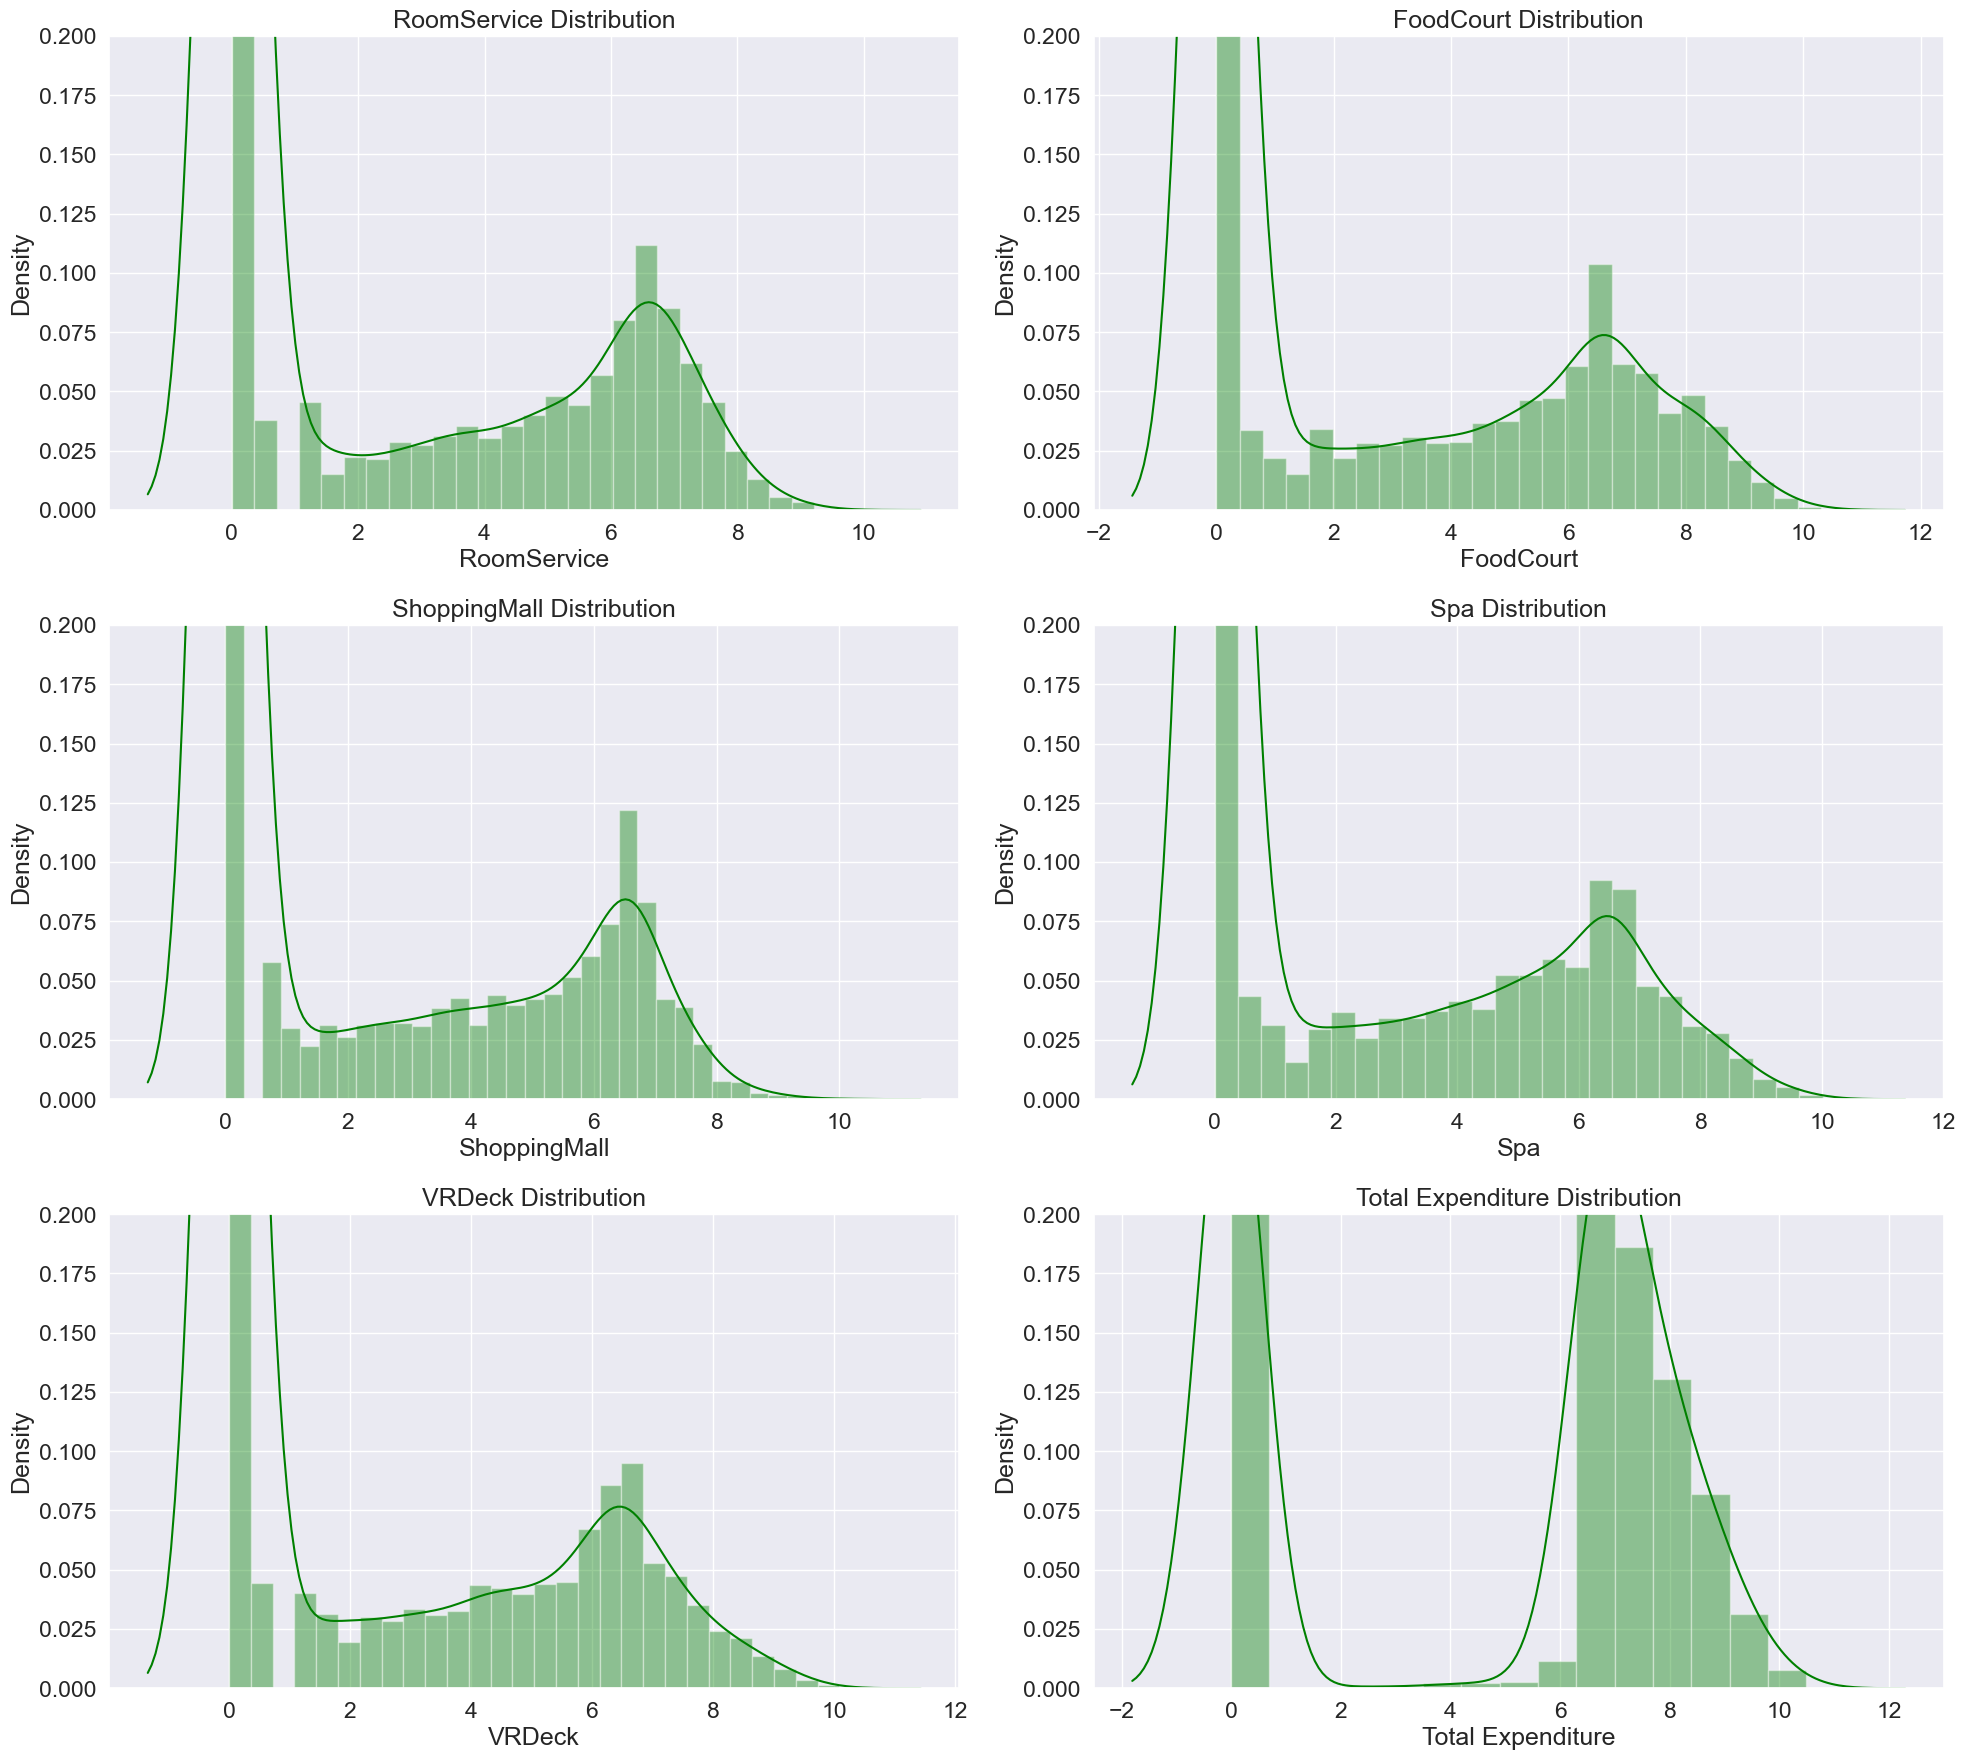

In [715]:
x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(train_df[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1
plt.show()

In [716]:
train_df.head(2)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,...,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category
0,Europa,False,TRAPPIST-1e,39.0,False,0.00000,0.000000,0.000000,0.000000,0.000000,...,True,False,False,False,False,False,Age_33_50,0.000000,True,No Expense
1,Earth,False,TRAPPIST-1e,24.0,False,4.70048,2.302585,3.258097,6.309918,3.806662,...,True,False,False,False,False,False,Age_19-25,6.602588,False,Medium Expense


In [717]:
train_df.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age Group                object
Total Expenditure       float64
No Spending              object
Expenditure Category     object
dtype: object

In [718]:
cols = ["CryoSleep","VIP","Travelling_Solo","No Spending","Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4",
       "Cabin_Region5","Cabin_Region6"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)

In [719]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6","Age Group","No Spending",
                    "Expenditure Category"]

In [720]:
enc = LabelEncoder()

In [721]:
train_df[ordinal_cat_cols] = train_df[ordinal_cat_cols].apply(enc.fit_transform)
test_df[ordinal_cat_cols] = test_df[ordinal_cat_cols].apply(enc.fit_transform)

In [722]:
train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)

In [723]:
train_df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,...,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,...,4,0.000000,1,3,False,True,False,False,False,True
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,True,1,...,2,6.602588,0,2,True,False,False,False,False,True
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,False,0,...,5,9.248021,0,0,False,True,False,False,False,True
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,False,0,...,4,8.551981,0,0,False,True,False,False,False,True
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,True,1,...,1,6.995766,0,2,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41.0,1,0.000000,8.827615,0.000000,7.404888,4.317488,False,1,...,4,9.052165,0,0,False,True,False,True,False,False
8689,1,18.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,False,1,...,1,0.000000,1,3,True,False,False,False,True,False
8690,0,26.0,0,0.000000,0.000000,7.535297,0.693147,0.000000,True,1,...,3,7.535830,0,0,True,False,False,False,False,True
8691,0,32.0,0,0.000000,6.956545,0.000000,5.869297,8.082093,False,0,...,3,8.442039,0,0,False,True,False,True,False,False


In [724]:
train_df["Transported"].replace({False:0,True:1},inplace=True)

In [725]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

In [726]:
scaler = StandardScaler()

In [727]:
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

In [728]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [729]:
print(x_train.shape, y_train.shape)

(6954, 28) (6954, 1)


In [730]:
print(x_test.shape,y_test.shape)

(1739, 28) (1739, 1)


In [731]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [732]:
print(x_train1.shape, y_train1.shape)

(6954, 28) (6954, 1)


In [733]:
print(x_test1.shape, y_test1.shape)

(1739, 28) (1739, 1)


In [734]:
training_score = []
testing_score = []

In [735]:
def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,x_test_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,x_test_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,x_test_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 77.8400920333621
Accuracy_Score of LogisticRegression() model on Testing Data is: 77.34330074755607

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.759698275862069
Recall Score of LogisticRegression() model is: 0.8047945205479452
F1 Score of LogisticRegression() model is: 0.7815964523281597

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


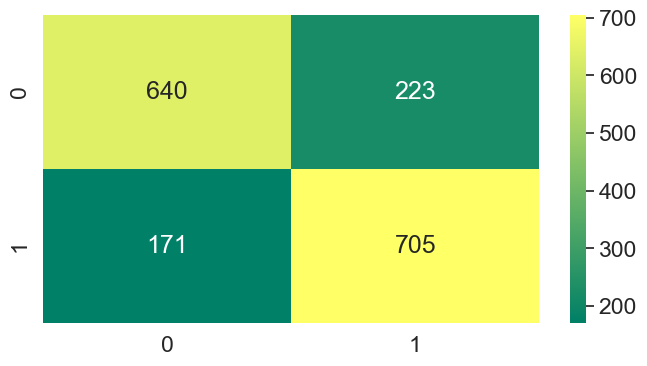

In [736]:
model_prediction(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 82.98820822548174
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 75.21564117308797

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.7671068427370948
Recall Score of KNeighborsClassifier() model is: 0.7294520547945206
F1 Score of KNeighborsClassifier() model is: 0.7478057343475717

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


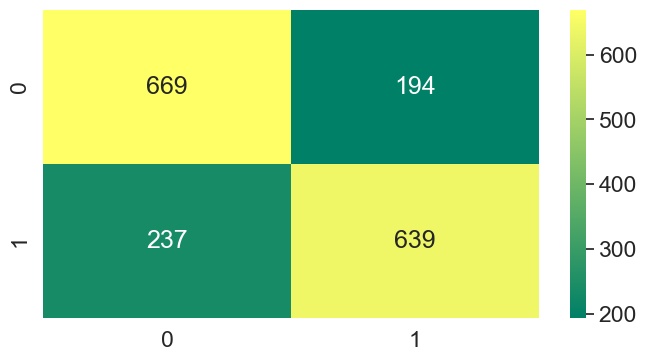

In [737]:
model_prediction(KNeighborsClassifier())

Accuracy_Score of SVC() model on Training Data is: 81.88093183779121
Accuracy_Score of SVC() model on Testing Data is: 79.81598619896492

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.8027681660899654
Recall Score of SVC() model is: 0.7945205479452054
F1 Score of SVC() model is: 0.7986230636833046

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


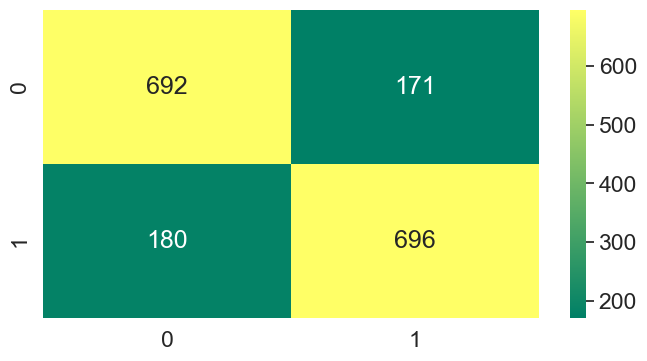

In [738]:
model_prediction(SVC())

Accuracy_Score of GaussianNB() model on Training Data is: 73.97181478285879
Accuracy_Score of GaussianNB() model on Testing Data is: 73.43300747556066

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.7782258064516129
Recall Score of GaussianNB() model is: 0.660958904109589
F1 Score of GaussianNB() model is: 0.7148148148148148

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


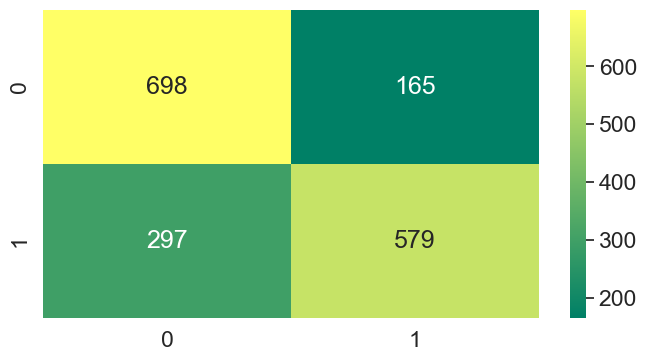

In [739]:
model_prediction(GaussianNB())

In [740]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*a
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 98.53321829163072
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 73.03583575498102

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 0.7453917050691244
Recall Score of DecisionTreeClassifier() model is: 0.7385844748858448
F1 Score of DecisionTreeClassifier() model is: 0.7419724770642202

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


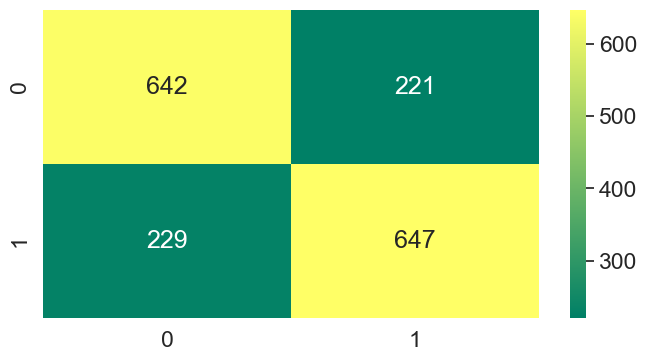

In [741]:
model_prediction(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 98.51883807880355
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 78.97369768939168

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 0.8218181818181818
Recall Score of RandomForestClassifier() model is: 0.773972602739726
F1 Score of RandomForestClassifier() model is: 0.7971781305114638

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


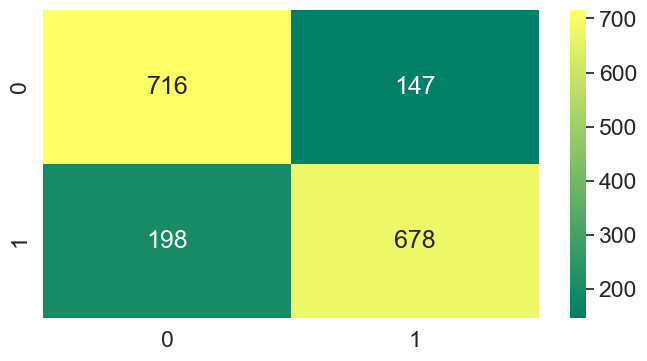

In [742]:
model_prediction(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 79.93960310612597
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 63.43683282717299

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.7667698658410733
Recall Score of AdaBoostClassifier() model is: 0.8481735159817352
F1 Score of AdaBoostClassifier() model is: 0.805420054200542

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


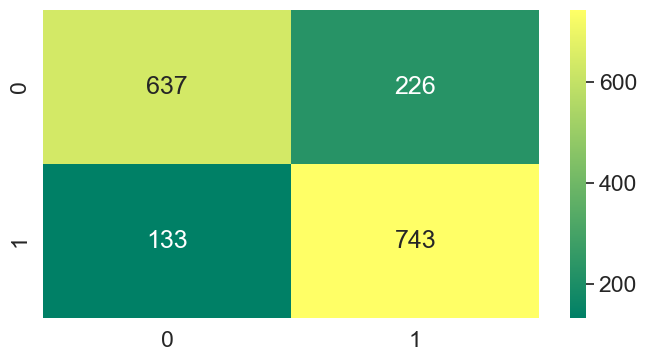

In [743]:
model_prediction(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 82.053494391717
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 65.3974371632661

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.7761351636747624
Recall Score of GradientBoostingClassifier() model is: 0.839041095890411
F1 Score of GradientBoostingClassifier() model is: 0.8063631376851343

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


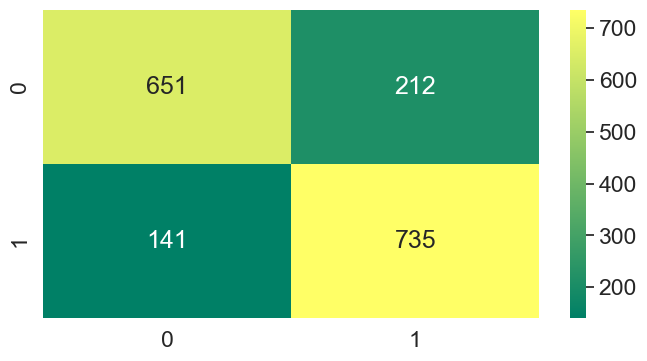

In [744]:

model_prediction(GradientBoostingClassifier())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
Accuracy_Score of LGBMClassifier() model on Training Data is: 88.68277250503307
Accuracy_Score of LGBMClassifier() model on Testing Data is: 72.5169077068183

------------------------------------------------------------------------
Precision Score of LGBMClassifier() model is: 0.812989921612542
Recall Score of LGBMClassifier() model is: 0.8287671232876712
F1 Score 

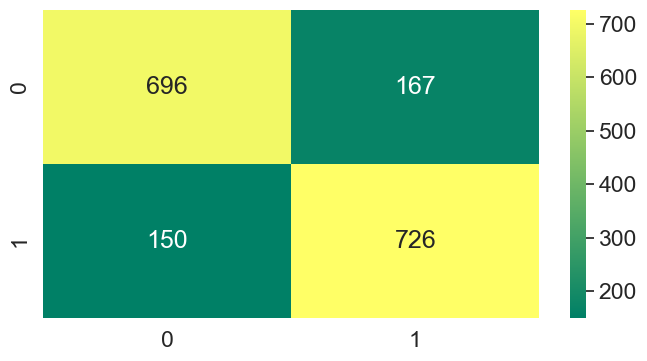

In [745]:
model_prediction(LGBMClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) model on Training Data is: 93.16939890710383
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None,

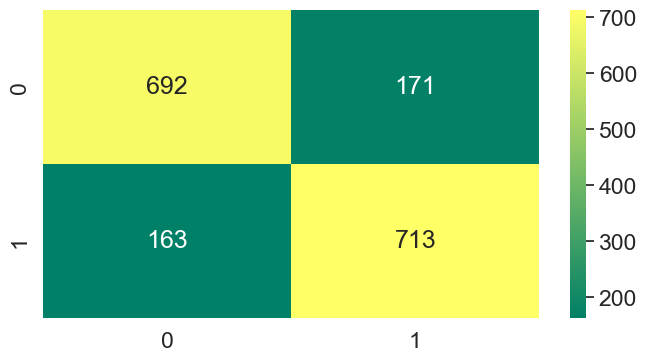

In [746]:
model_prediction(XGBClassifier())

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001EABCF558E0> model on Training Data is: 87.40293356341674
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001EABCF558E0> model on Testing Data is: 70.86724342979736

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x000001EABCF558E0> model is: 0.8008800880088008
Recall Score of <catboost.core.CatBoostClassifier object at 0x000001EABCF558E0> model is: 0.8310502283105022
F1 Score of <catboost.core.CatBoostClassifier object at 0x000001EABCF558E0> model is: 0.8156862745098039

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x000001EABCF558E0> model is:


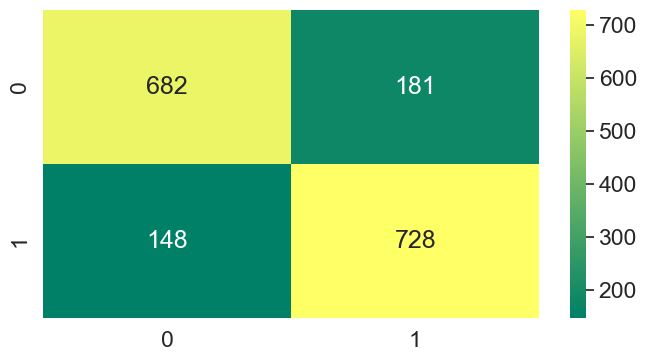

In [747]:
model_prediction(CatBoostClassifier(verbose=False))

In [748]:
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost","CatBoost"]

In [749]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":training_score,
                   "Testing Score":testing_score})

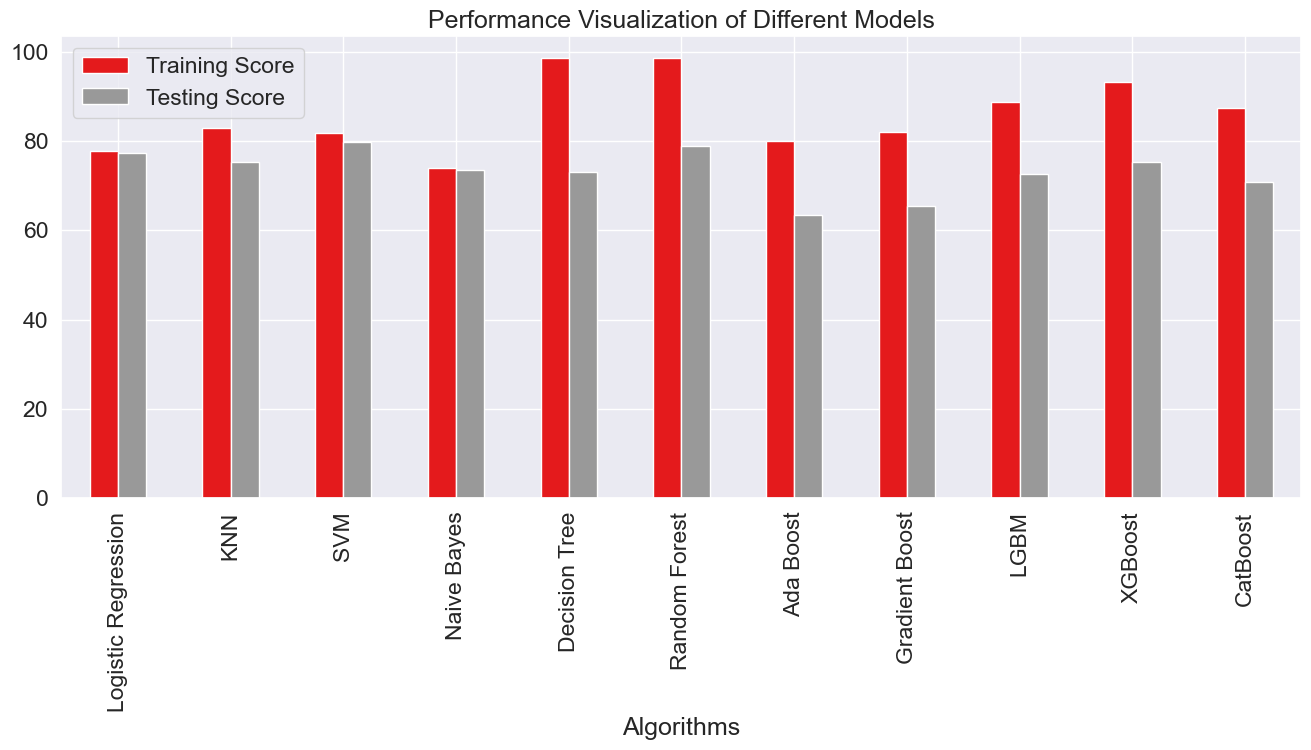

In [750]:
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

In [751]:
model1 = LGBMClassifier()

In [752]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

In [753]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [754]:
grid_search1.fit(x_train,y_train.values.ravel())

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [755]:
grid_search1.best_score_

0.8094621642728951

In [756]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.01,
 'n_estimators': 600,
 'num_leaves': 17,
 'random_state': 0}

In [757]:
model1 = LGBMClassifier(**best_parameters1)

In [758]:
model1.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380


LGBMClassifier(learning_rate=0.01, n_estimators=600, num_leaves=17,
               random_state=0)

In [759]:
x_test_pred1 = model1.predict(x_test)

In [760]:
accuracy_score(y_test,x_test_pred1)

0.80448533640023

In [761]:
model2 = CatBoostClassifier(verbose=False)

In [762]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [763]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [764]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001EAC9665B80>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [765]:
grid_search2.best_score_

0.8061541564735272

In [766]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 50, 'learning_rate': 0.3, 'random_state': 0}

In [767]:
model2 = CatBoostClassifier(**best_parameters2,verbose=False)

In [768]:
model2.fit(x_train,y_train)

In [769]:
x_test_pred2 = model2.predict(x_test)

In [770]:
accuracy_score(y_test,x_test_pred2)

0.8131109833237493

In [771]:
model3 = XGBClassifier()

In [772]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [773]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [774]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [775]:
grid_search3.best_score_

0.8084546597086097

In [776]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.3, 'n_estimators': 50, 'random_state': 0}

In [777]:
model3 = XGBClassifier(**best_parameters3)

In [778]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [779]:
x_test_pred3 = model3.predict(x_test)

In [780]:
accuracy_score(y_test,x_test_pred3)

0.8113858539390454

In [781]:
model4 = RandomForestClassifier()

In [782]:
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}
    

In [783]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [784]:
grid_search4.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [785]:
grid_search4.best_score_

0.8014084375921261

In [786]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'n_estimators': 100}

In [787]:
model4 = RandomForestClassifier(**best_parameters4)

In [788]:

model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=9)

In [789]:
x_test_pred4 = model4.predict(x_test)

In [790]:
accuracy_score(y_test,x_test_pred4)

0.8027602070155262

In [791]:
stacking_model = StackingClassifier(estimators=[('LGBM', model1), 
                                                ('CAT Boost', model2),
                                                ("XGBoost", model3),
                                                ('RF', model4)])

In [792]:
stacking_model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1668
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] Start training from score 0.014380
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2802, number of negative: 2761
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise

StackingClassifier(estimators=[('LGBM',
                                LGBMClassifier(learning_rate=0.01,
                                               n_estimators=600, num_leaves=17,
                                               random_state=0)),
                               ('CAT Boost',
                                <catboost.core.CatBoostClassifier object at 0x000001EAC969F7A0>),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_s...
                                              interaction_constraints=None,
                                              learning_rate=0.3, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=50, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('RF',
                                RandomForestClassifier(max_depth=12,
                                                       min_samples_leaf=5,
                                                       min_samples_split=9))])

In [966]:
x_train_pred5 = stacking_model.predict(x_train)

In [968]:
x_test_pred5 = stacking_model.predict(x_test)

In [795]:
print("Stacking Model accuracy on Training Data is:",accuracy_score(y_train,x_train_pred5)*100)

Stacking Model accuracy on Training Data is: 86.31003738855335


In [ ]:
print("Stacking Model accuracy on Testing Data is:",accuracy_score(y_test,x_test_pred5)*100)

In [970]:
pred = stacking_model.predict(test_df)

In [972]:
pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [974]:
pass_df.head()

,PassengerId
0,0013_01
1,0018_01
2,0019_01
3,0021_01
4,0023_01


In [976]:
pass_df["Transported"] = pred

In [978]:
pass_df.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,0


In [980]:
pass_df["Transported"].replace({1:True,0:False},inplace=True)

In [982]:
pass_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [984]:
pass_df.shape

(4277, 2)

In [ ]:
pass_df.to_csv("spaceship_prediction_project.csv",index=False)